# Apendice

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pandas as pd
import random
from sklearn.linear_model import LinearRegression

## Dados usados

In [ ]:
import yfinance as yf
import pandas_datareader.data as web
yf.pdr_override()

# Calcula os retornos diários

price_embraer = web.get_data_yahoo(['EMBR3.SA'], start = '2022-01-01',
                            end = '2022-04-01')

price_ambev = web.get_data_yahoo(['ABEV3.SA'], start = '2022-01-01',
                            end = '2022-04-01')

price_tms = web.get_data_yahoo(['TSM'], start = '2022-01-01',
                            end = '2022-04-01')

price_vale = web.get_data_yahoo(['VALE3.SA'], start = '2022-01-01',
                            end = '2022-04-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
price_ambev

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,15.42,15.54,15.15,15.33,14.562695,23833600
2022-01-04,15.32,15.40,15.04,15.31,14.543696,16357700
2022-01-05,15.25,15.29,14.96,15.01,14.258712,24652000
2022-01-06,15.04,15.06,14.66,14.77,14.030725,20406300
2022-01-07,14.80,14.80,14.45,14.53,13.802736,19673600
...,...,...,...,...,...,...
2022-03-25,14.28,14.35,13.95,14.32,13.603248,33591300
2022-03-28,14.43,14.75,14.38,14.74,14.002226,19531800
2022-03-29,14.95,15.40,14.87,15.25,14.486699,38100100


In [ ]:
price_vale

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,79.000000,79.970001,78.000000,78.000000,69.639427,18557200
2022-01-04,78.510002,79.070000,76.900002,77.080002,68.818031,18178700
2022-01-05,77.370003,78.680000,77.129997,77.809998,69.469795,22039000
2022-01-06,78.639999,80.349998,78.309998,79.379997,70.871498,22044100
2022-01-07,80.400002,84.000000,79.790001,84.000000,74.996300,35213100
...,...,...,...,...,...,...
2022-03-25,97.699997,98.300003,94.300003,95.230003,88.291336,22505500
2022-03-28,95.699997,96.339996,93.610001,95.339996,88.393318,16274200
2022-03-29,95.339996,95.660004,93.400002,94.519997,87.633064,38228800


In [ ]:
price_tms

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,124.129997,129.589996,124.000000,128.800003,124.902397,18592000
2022-01-04,130.869995,135.500000,130.300003,133.399994,129.363190,25554900
2022-01-05,130.710007,130.880005,126.879997,127.059998,123.215042,17891200
2022-01-06,127.000000,129.000000,124.809998,128.470001,124.582382,16249000
2022-01-07,126.550003,127.139999,123.309998,123.500000,119.762772,21248100
...,...,...,...,...,...,...
2022-03-25,107.690002,107.980003,105.839996,106.730003,103.999420,7432100
2022-03-28,105.620003,106.720001,104.610001,106.330002,103.609657,8151200
2022-03-29,107.919998,109.760002,106.790001,109.250000,106.454941,14076200


In [ ]:
price_embraer

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,24.820000,25.620001,24.459999,25.240000,25.240000,15115200
2022-01-04,25.400000,25.500000,24.809999,25.219999,25.219999,10270000
2022-01-05,24.950001,25.080000,23.600000,23.719999,23.719999,12826700
2022-01-06,23.760000,24.070000,23.010000,23.870001,23.870001,13751000
2022-01-07,23.709999,24.570000,23.270000,24.070000,24.070000,8922100
...,...,...,...,...,...,...
2022-03-25,15.480000,15.660000,15.130000,15.190000,15.190000,8153900
2022-03-28,15.220000,15.280000,14.790000,15.090000,15.090000,6604500
2022-03-29,15.310000,16.010000,15.310000,15.620000,15.620000,9460200


# Justificativa dos códigos(JR)

## Calibrando o modelo

Como a taxa Selic é usada para a precificação dos contratos aqui considerados, iremos supor que $r_{ano}$ é a taxa nominal de juros Selic.

Supondo equivalencias de taxas efetivas temos $(1+r_{dia})^{360}=1+r_{ano} \Leftrightarrow (1+r_{ano})^{\frac{1}{360}}-1=r_{dia}$.

### Calculando o Retorno

Defina Salto de uma ação como $J_n=\frac{S_{n+1}}{S_n}$ e o retorno será $ R(S_n) = \frac{\Delta S_n}{S_n}= J_n-1$.

Também defina média de retorno como $\hat{m}_{dia} = \frac{\Sigma_{i=1}^MJ_n}{M}\text{e a variância como } \hat{\sigma}^2_{dia} = \frac{\Sigma_{i=1}^M(J_n-\hat{m}_{dia})^2}{M-1} $

### Mudança de escala

Seja $J_{q,m} = \frac{S_{n+q}}{S_n}$ o que siginica que é o salto no intervalo $[n+1,n+q]$,  então temos que $E[J_{q,m}^k] = E[J_{1,m}^k]^q: J_{q,m} = \frac{S_{n+q}}{S_n} = \frac{S_{n+1}}{S_{n}}\frac{S_{n+2}}{S_{n+1}}...\frac{S_{n+q-2}}{S_{n+q-3}}\frac{S_{n+q-1}}{S_{n+q-2}}\frac{S_{n+q}}{S_{n+q-1}} \Leftrightarrow E[J_{q,m}] = E[\frac{S_{n+1}}{S_{n}}\frac{S_{n+2}}{S_{n+1}}...\frac{S_{n+q-2}}{S_{n+q-3}}\frac{S_{n+q-1}}{S_{n+q-2}}\frac{S_{n+q}}{S_{n+q-1}}] \Leftrightarrow  E[J_{q,m}^k] = E[\Pi_{i=0}^q(\frac{S_{n+1+i}}{S_{n+i}})^k]$

Por hipótese, os saltos são indepedentes um dos outros e sua média é igual para o mesmo tamanho de salto, ou seja, temos: $\Pi_{i=0}^qE[(\frac{S_{n+1+i}}{S_{n+i}})^k]=E[J_{q,1}^k]^q $.

Daí, concluímos que $E[J_{q,m}^k] = E[J_{1,m}^k]^q$, a média de saltos de tamanho $q$ é a mesma que a média de saltos de tamanho $1$ feita $q$ vezes.

Podemos generalizar; suponha que $E[J_{q,\Delta t}] = m_{\Delta t}$ e sabemos que $E[J_{1,\Delta t}^2] = \sigma_{\Delta t}^2+m_{\Delta t}^2 $

seguindo a mesma lógica, temos que se $q\Delta t = p $ temos que  $E[J_{1,1}]^p = m_1^p \text{ enquanto } E[J_{1,\Delta t}]^q = m_{\Delta t}^q \text{ logo, temos que pela primeira conclusão obtemos } E[J_{1,\Delta t }^2]^q = E[J_{1,1}^2]^p= (\sigma_{\Delta t}^2+m_{\Delta t}^2)^q=(\sigma_{1}^2+m_{1}^2)^p $

Podemos concluir que $\sigma_{\Delta t}^2+m_{\Delta t}^2=(\sigma_{1}^2+m_{1}^2)^{\Delta t} \Rightarrow \sigma_{\Delta t}^2 = (\sigma_{1}^2+m_{1}^2)^{\Delta t} -m_{1}^{2\Delta t} $

Assim podemos obter:

 $$ \begin{equation} E[J_{1,\Delta t}] = m_{1}^{\Delta t}\\
\sigma_{\Delta t} = \sqrt{(\sigma_{1}^2+m_{1}^2)^{\Delta t} -m_{1}^{2\Delta t}} \end{equation}$$

## Em busca de um modelo calibrado sem arbitragem

Temos que no modelo JR;
$$E[J_n] = \frac{u+d}{2}\\
V[J_n] = E[J_n^2]-E^2[J_n]=\tfrac{u^2+d^2}{2}-(\tfrac{u+d}{2})^2 = (\tfrac{u-d}{2})^2 $$

Agora vamos considerar um modelo calibrado onde: $\ m_{\Delta t} = \dfrac{u+d}{2} \text{ e } \sigma_{\Delta t} = \dfrac{u-d}{2} $

Podemos resolver o sistema e obteremos
$$ u_{\Delta t}=m_{\Delta t}+\sigma_{\Delta t} \\ d_{\Delta t} = m_{\Delta t}-\sigma_{\Delta t}$$

Para garantir a ausência de arbitragem é necessário e suficiente que:

$\sigma_{dia}<m_{dia}$

$0<d_{\Delta t}<1+r_{\Delta t}<u_{\Delta t}(*)$

É fácil ver que para que não aja arbitragem é suficiente que no modelo calibrado a condição abaixo seja satisfeita:

$$((\tfrac{1+r_{dia}}{m_{dia}})^{\Delta t}-1))^2<((\tfrac{\sigma_{dia}}{m_{dia}})^2+1)^{\Delta t} -1(**)$$












Demonstração de (**):

Por $(*)$ temos

$$0<m_{\Delta t}-(1+r_{\Delta t})<\sigma_{\Delta t}\\
0<(1+r_{\Delta t})-m_{\Delta t}<\sigma_{\Delta t}$$

Assim, temos que:
$$|(1+r_{\Delta t})-m_{\Delta t}|<\sigma_{\Delta t}\\
((\tfrac{1+r_{dia}}{m_{dia}})^{\Delta t}-1))^2<(\tfrac{(\sigma_{dia}^2+m_{dia}^2)}{m_{dia}^2})^{\Delta t} -1\\
((\tfrac{1+r_{dia}}{m_{dia}})^{\Delta t}-1))^2<((\tfrac{\sigma_{dia}}{m_{dia}})^2+1)^{\Delta t} -1$$

# Modelo Jarrow&Rudd para precificação de contratos

In [ ]:
class JR():

  def __init__(self,series):
    self.series=series

  # Supondo r sendo a taxa selic, ajustando a taxa nominal anual para diaria
  def calibranting_interest(self,r,n=360): # supondo ano comercial
    interest_rate = []
    # Supondo que r possa mudar durante o tempo, para uma serie t. grande
    if type(r)==list:
      for i in r:
        interest_rate.append((1+i)**(1/n)-1)
    else:
      return (1+r)**(1/n)-1
    return interest_rate

  # usaremos p=q como suposição, e calculamos os parâmetros necessários para a precificação
  def parameters_calculator(self,interest_rate,T,N):
    Jn = np.array([self.series[i+1] for i in range(len(self.series)-1)])/np.array([self.series[i] for i in range(len(self.series)-1)]) # saltos ao longo da s.t.
    hat_m = sum(Jn)/len(Jn) # estimativa da média dos saltos
    hat_sigma = sum(((Jn-hat_m*np.ones(len(Jn)))**2)/(len(Jn)-1))**0.5 # estimativa do stdp dos saltos
    p,q = [0.5,0.5]  # suposição das prob neutra riscos iguais a 0.5
    delta_t = T/N    # dado um delta(step) do tempo pelo número de passos
    M0 = (1+interest_rate)/hat_m
    M1 = (1+(hat_sigma/hat_m)**2)
    while (1-M0**delta_t)**2>=M1**delta_t-1: # condições necessarias para a ausência de arbitragem
      delta_t = delta_t/2
    return delta_t,hat_m,hat_sigma,Jn

  def parameters_precing_options(self,delta_t,interest_rate,hat_m,hat_sigma):
    m_delta_t = hat_m**delta_t
    sigma_delta_t = ((hat_m**2+hat_sigma**2)**delta_t-hat_m**(2*delta_t))**0.5
    r_delta_t = (1+interest_rate)**delta_t-1
    u_delta_t = m_delta_t+sigma_delta_t
    d_delta_t = m_delta_t-sigma_delta_t
    return m_delta_t,sigma_delta_t,r_delta_t,u_delta_t,d_delta_t

  def simulate_price_path(self,S0, T, delta_t, u_delta_t, d_delta_t, p):
    S = S0
    t = 0
    serie_simulada = [S0]

    while t < T:
        t += delta_t
        if np.random.uniform(0,1) < p:
            S = u_delta_t * S
        else:
            S = d_delta_t * S
        serie_simulada.append(S)
    return serie_simulada

    # Retornar o valor da opção
    return returns[0][0]

*Teste*

In [ ]:
def main(): # testando o código para saber se estamos obtendo u,d e r tais que o modelo JR fica sem arbitragem(codigo de teste, deve ser mudado)
  serie = [12, 13, 11, 10, 7] # serie temporal hipotética para teste
  price = JR(serie)
  taxes = price.calibranting_interest(34.94964) # taxa selic selic captalizada diáriamente
  delta_t,hat_m,hat_sigma,Jn = price.parameters_calculator(taxes,15,2**4)
  m,sigma,r,u,d = price.parameters_precing_options(delta_t,taxes,hat_m,hat_sigma)
  print("u  :"+str(u))
  print("r+1:"+str(r+1))
  print("d  :"+str(d))
main()

u  :1.0463077523529591
r+1:1.009372080538223
d  :0.7365871315834163


# Codigos da questão 1

In [ ]:
Embraer_Price = JR(np.array(price_embraer.Open))
Ambev_Price = JR(np.array(price_ambev.Open))
vale_Price = JR(np.array(price_vale.Open))
tms_Price = JR(np.array(price_tms.Open))

In [ ]:
taxes = Embraer_Price.calibranting_interest(12.24)
delta_te,hat_me,hat_sigmae,Jne = Embraer_Price.parameters_calculator(taxes,62,62)  # parametros dos saltos da serie temporal da Embraer
print(delta_te,hat_me,hat_sigmae)

delta_ta,hat_ma,hat_sigmaa,Jna = Ambev_Price.parameters_calculator(taxes,62,62)    # parametros dos saltos da serie temporal da Ambev
print(delta_ta,hat_ma,hat_sigmaa)

delta_tv,hat_mv,hat_sigmav,Jnv = vale_Price.parameters_calculator(taxes,62,62)     # parametros dos saltos da serie temporal da Vale
print(delta_tv,hat_mv,hat_sigmav)

delta_tt,hat_mt,hat_sigmat,Jnt = tms_Price.parameters_calculator(taxes,62,62)      # parametros dos saltos da serie temporal da Taiwan semicoductor manufaturing
print(delta_tt,hat_mt,hat_sigmat)

1.0 0.992689199446444 0.03241827804493852
1.0 0.9999392512289437 0.01703710469290631
1.0 1.003781807987246 0.032417673910412254
1.0 0.9979440457759063 0.027819109269729095


In [ ]:
Cres_medio = [np.array(price_embraer.Open)[0]]
t=0
while len(Cres_medio)<len(np.array(price_embraer.Open)):
  Cres_medio.append(hat_me*Cres_medio[t])
  t+=1

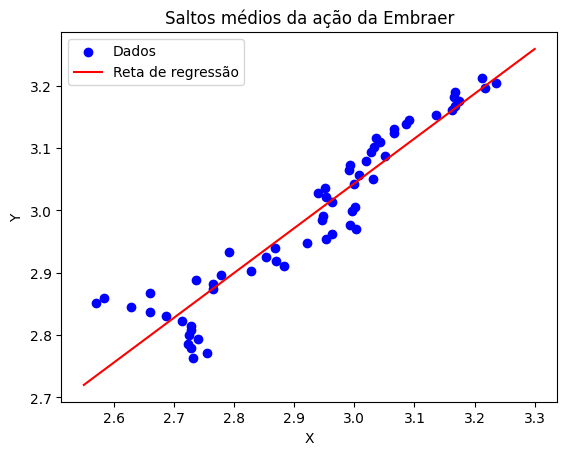

In [ ]:
# Criando o objeto de regressão linear
model = LinearRegression()

# Treinando o modelo
model.fit(np.log(np.array(price_embraer.Open)).reshape(-1,1),np.log(np.array(Cres_medio)))

# Fazendo previsões para traçar a reta
X_plot = np.linspace(2.55, 3.3, 100).reshape(-1,1)
Y_plot = model.predict(X_plot)

# Plotando os dados e a reta de regressão
plt.scatter(np.log(np.array(price_embraer.Open)),np.log(Cres_medio), color='blue', label='Dados')
plt.plot(X_plot, Y_plot, color='red', label='Reta de regressão')
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Saltos médios da ação da Embraer")
plt.legend()
plt.show()

In [ ]:
print(f'o coeficinete angular da reta é {((Y_plot[2]-Y_plot[1])/(X_plot[2]-X_plot[1]))[0]} e a média dos jumps é {hat_me}')

o coeficinete angular da reta é 0.7184809663861355 e a média dos jumps é 0.992689199446444


In [ ]:
Cres_medio = [np.array(price_ambev.Open)[0]]
t=0
while len(Cres_medio)<len(np.array(price_ambev.Open)):
  Cres_medio.append(hat_ma*Cres_medio[t])
  t+=1

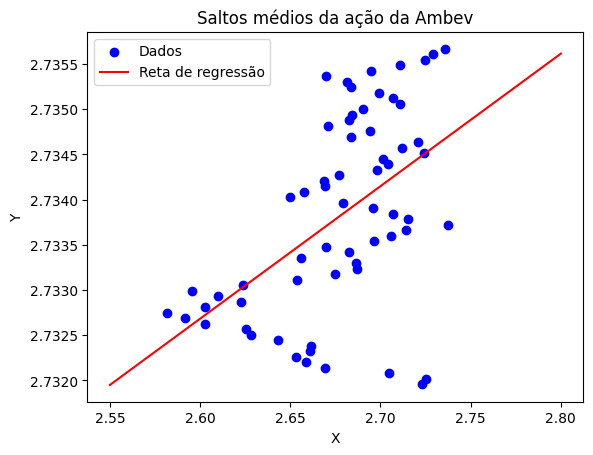

In [ ]:
# Criando o objeto de regressão linear
model = LinearRegression()

# Treinando o modelo
model.fit(np.log(np.array(price_ambev.Open)).reshape(-1,1),np.log(np.array(Cres_medio)))

# Fazendo previsões para traçar a reta
X_plot = np.linspace(2.55, 2.8, 100).reshape(-1,1)
Y_plot = model.predict(X_plot)

# Plotando os dados e a reta de regressão
plt.scatter(np.log(np.array(price_ambev.Open)),np.log(Cres_medio), color='blue', label='Dados')
plt.plot(X_plot, Y_plot, color='red', label='Reta de regressão')
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Saltos médios da ação da Ambev")
plt.legend()
plt.show()

In [ ]:
print(f'o coeficinete angular da reta é {((Y_plot[2]-Y_plot[1])/(X_plot[2]-X_plot[1]))[0]} e a média dos jumps é {hat_ma}')

o coeficinete angular da reta é 0.014653275054974851 e a média dos jumps é 0.9999392512289437


In [ ]:
Cres_medio = [np.array(price_vale.Open)[0]]
t=0
while len(Cres_medio)<len(np.array(price_vale.Open)):
  Cres_medio.append(hat_mv*Cres_medio[t])
  t+=1

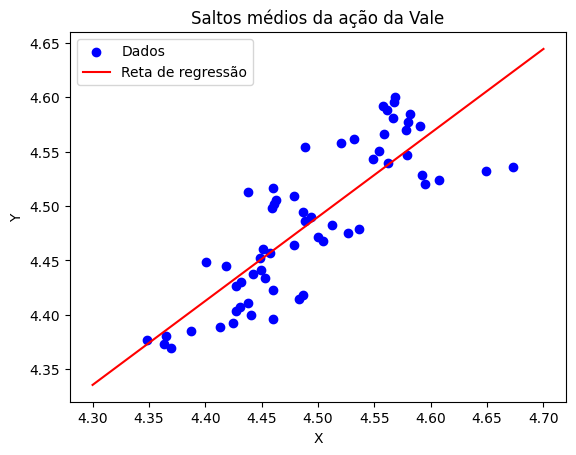

In [ ]:
# Criando o objeto de regressão linear
model = LinearRegression()

# Treinando o modelo
model.fit(np.log(np.array(price_vale.Open)).reshape(-1,1),np.log(np.array(Cres_medio)))

# Fazendo previsões para traçar a reta
X_plot = np.linspace(4.3, 4.7, 100).reshape(-1,1)
Y_plot = model.predict(X_plot)

# Plotando os dados e a reta de regressão
plt.scatter(np.log(np.array(price_vale.Open)),np.log(Cres_medio), color='blue', label='Dados')
plt.plot(X_plot, Y_plot, color='red', label='Reta de regressão')
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Saltos médios da ação da Vale")
plt.legend()
plt.show()

In [ ]:
print(f'o coeficinete angular da reta é {((Y_plot[2]-Y_plot[1])/(X_plot[2]-X_plot[1]))[0]} e a média dos jumps é {hat_me}')

o coeficinete angular da reta é 0.7723641056183074 e a média dos jumps é 0.992689199446444


In [ ]:
Cres_medio = [np.array(price_tms.Open)[0]]
t=0
while len(Cres_medio)<len(np.array(price_tms.Open)):
  Cres_medio.append(hat_mt*Cres_medio[t])
  t+=1

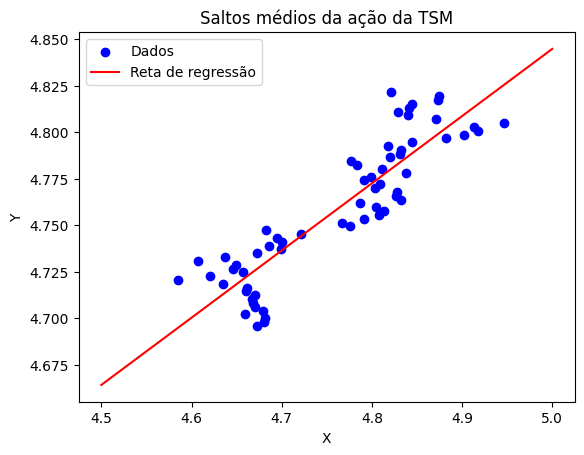

In [ ]:
# Criando o objeto de regressão linear
model = LinearRegression()

# Treinando o modelo
model.fit(np.log(np.array(price_tms.Open)).reshape(-1,1),np.log(np.array(Cres_medio)))

# Fazendo previsões para traçar a reta
X_plot = np.linspace(4.5, 5, 100).reshape(-1,1)
Y_plot = model.predict(X_plot)

# Plotando os dados e a reta de regressão
plt.scatter(np.log(np.array(price_tms.Open)),np.log(Cres_medio), color='blue', label='Dados')
plt.plot(X_plot, Y_plot, color='red', label='Reta de regressão')
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Saltos médios da ação da TSM")
plt.legend()
plt.show()

In [ ]:
print(f'o coeficinete angular da reta é {((Y_plot[2]-Y_plot[1])/(X_plot[2]-X_plot[1]))[0]} e a média dos jumps é {hat_me}')

o coeficinete angular da reta é 0.3612120377063576 e a média dos jumps é 0.992689199446444


In [ ]:
me,sigmae,re,ue,de = Embraer_Price.parameters_precing_options(delta_te,taxes,hat_me,hat_sigmae)

In [ ]:
ma,sigmaa,ra,ua,da = Ambev_Price.parameters_precing_options(delta_ta,taxes,hat_ma,hat_sigmaa)

In [ ]:
mv,sigmav,rv,uv,dv = vale_Price.parameters_precing_options(delta_tv,taxes,hat_mv,hat_sigmav)

In [ ]:
mt,sigmat,rt,ut,dt = vale_Price.parameters_precing_options(delta_tt,taxes,hat_mt,hat_sigmat)

In [ ]:
simul1e = Embraer_Price.simulate_price_path(np.array(price_embraer.Open)[0], 62, delta_te, ue, de, 1/2)
simul2e = Embraer_Price.simulate_price_path(np.array(price_embraer.Open)[0], 62, delta_te, ue, de, 1/2)
simul3e = Embraer_Price.simulate_price_path(np.array(price_embraer.Open)[0], 62, delta_te, ue, de, 1/2)
simul4e = Embraer_Price.simulate_price_path(np.array(price_embraer.Open)[0], 62, delta_te, ue, de, 1/2)
simul5e = Embraer_Price.simulate_price_path(np.array(price_embraer.Open)[0], 62, delta_te, ue, de, 1/2)
x = np.linspace(0,61,62*10+1)

In [ ]:
simul1a = Ambev_Price.simulate_price_path(np.array(price_ambev.Open)[0], 62, delta_ta, ua, da, 1/2)
simul2a = Ambev_Price.simulate_price_path(np.array(price_ambev.Open)[0], 62, delta_ta, ua, da, 1/2)
simul3a = Ambev_Price.simulate_price_path(np.array(price_ambev.Open)[0], 62, delta_ta, ua, da, 1/2)
simul4a = Ambev_Price.simulate_price_path(np.array(price_ambev.Open)[0], 62, delta_ta, ua, da, 1/2)
simul5a = Ambev_Price.simulate_price_path(np.array(price_ambev.Open)[0], 62, delta_ta, ua, da, 1/2)
x = np.linspace(0,61,62*10+1)

In [ ]:
simul1v = vale_Price.simulate_price_path(np.array(price_vale.Open)[0], 62, delta_tv, uv, dv, 1/2)
simul2v = vale_Price.simulate_price_path(np.array(price_vale.Open)[0], 62, delta_tv, uv, dv, 1/2)
simul3v = vale_Price.simulate_price_path(np.array(price_vale.Open)[0], 62, delta_tv, uv, dv, 1/2)
simul4v = vale_Price.simulate_price_path(np.array(price_vale.Open)[0], 62, delta_tv, uv, dv, 1/2)
simul5v = vale_Price.simulate_price_path(np.array(price_vale.Open)[0], 62, delta_tv, uv, dv, 1/2)
x = np.linspace(0,61,62*10+1)

In [ ]:
simul1t = tms_Price.simulate_price_path(np.array(price_tms.Open)[0], 62, delta_tt, ut, dt, 1/2)
simul2t = tms_Price.simulate_price_path(np.array(price_tms.Open)[0], 62, delta_tt, ut, dt, 1/2)
simul3t = tms_Price.simulate_price_path(np.array(price_tms.Open)[0], 62, delta_tt, ut, dt , 1/2)
simul4t = tms_Price.simulate_price_path(np.array(price_tms.Open)[0], 62, delta_tt , ut, dt, 1/2)
simul5t = tms_Price.simulate_price_path(np.array(price_tms.Open)[0], 62, delta_tt, ut, dt, 1/2)
x = np.linspace(0,61,62*10+1)

In [ ]:
# Criação do gráfico de linha
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(0,61), y=simul1e,name='Precificação', mode='lines',line=dict(color='blue')))
fig.add_trace(go.Scatter(x=np.arange(0,61), y=simul2e, name='Precificação', mode='lines',line=dict(color='blue')))
fig.add_trace(go.Scatter(x=np.arange(0,61), y=simul3e, name='Precificação', mode='lines',line=dict(color='blue')))
fig.add_trace(go.Scatter(x=np.arange(0,61), y=simul4e, name='Precificação', mode='lines',line=dict(color='blue')))
fig.add_trace(go.Scatter(x=np.arange(0,61), y=simul5e, name='Precificação', mode='lines',line=dict(color='blue')))
fig.add_trace(go.Scatter(y=np.array(price_embraer.Open), name='Valor Real', mode='lines',line=dict(color='orange')))

# Personalização do layout
fig.update_layout(
    title='Precificação vs. Valor Real das Ações da Embraer',
    xaxis_title='Dias',
    yaxis_title='Valor da Ação',
    legend=dict(x=0.7, y=0.95)
)

In [ ]:
# Criação do gráfico de linha
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(0,61), y=simul1a,name='Precificação', mode='lines',line=dict(color='blue')))
fig.add_trace(go.Scatter(x=np.arange(0,61), y=simul2a, name='Precificação', mode='lines',line=dict(color='blue')))
fig.add_trace(go.Scatter(x=np.arange(0,61), y=simul3a, name='Precificação', mode='lines',line=dict(color='blue')))
fig.add_trace(go.Scatter(x=np.arange(0,61), y=simul4a, name='Precificação', mode='lines',line=dict(color='blue')))
fig.add_trace(go.Scatter(x=np.arange(0,61), y=simul5a, name='Precificação', mode='lines',line=dict(color='blue')))
fig.add_trace(go.Scatter(y=np.array(price_ambev.Open), name='Valor Real', mode='lines',line=dict(color='orange')))

# Personalização do layout
fig.update_layout(
    title='Precificação vs. Valor Real das Ações da Ambev',
    xaxis_title='Dias',
    yaxis_title='Valor da Ação',
    legend=dict(x=0.7, y=0.95)
)

In [ ]:
# Criação do gráfico de linha
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(0,61), y=simul1v,name='Precificação', mode='lines',line=dict(color='blue')))
fig.add_trace(go.Scatter(x=np.arange(0,61), y=simul2v, name='Precificação', mode='lines',line=dict(color='blue')))
fig.add_trace(go.Scatter(x=np.arange(0,61), y=simul3v, name='Precificação', mode='lines',line=dict(color='blue')))
fig.add_trace(go.Scatter(x=np.arange(0,61), y=simul4v, name='Precificação', mode='lines',line=dict(color='blue')))
fig.add_trace(go.Scatter(x=np.arange(0,61), y=simul5v, name='Precificação', mode='lines',line=dict(color='blue')))
fig.add_trace(go.Scatter(y=np.array(price_vale.Open), name='Valor Real', mode='lines',line=dict(color='orange')))

# Personalização do layout
fig.update_layout(
    title='Precificação vs. Valor Real das Ações da Vale',
    xaxis_title='Dias',
    yaxis_title='Valor da Ação',
    legend=dict(x=0.7, y=0.95)
)

In [ ]:
# Criação do gráfico de linha
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(0,61), y=simul1t,name='Precificação', mode='lines',line=dict(color='blue')))
fig.add_trace(go.Scatter(x=np.arange(0,61), y=simul2t, name='Precificação', mode='lines',line=dict(color='blue')))
fig.add_trace(go.Scatter(x=np.arange(0,61), y=simul3t, name='Precificação', mode='lines',line=dict(color='blue')))
fig.add_trace(go.Scatter(x=np.arange(0,61), y=simul4t, name='Precificação', mode='lines',line=dict(color='blue')))
fig.add_trace(go.Scatter(x=np.arange(0,61), y=simul5t, name='Precificação', mode='lines',line=dict(color='blue')))
fig.add_trace(go.Scatter(y=np.array(price_tms.Open), name='Valor Real', mode='lines',line=dict(color='orange')))

# Personalização do layout
fig.update_layout(
    title='Precificação vs. Valor Real das Ações da TSM',
    xaxis_title='Dias',
    yaxis_title='Valor da Ação',
    legend=dict(x=0.7, y=0.95)
)

In [ ]:
delta_te,hat_me,hat_sigmae,Jne = Embraer_Price.parameters_calculator(taxes,1,10)
delta_ta,hat_ma,hat_sigmaa,Jna = Ambev_Price.parameters_calculator(taxes,1,10)
delta_tv,hat_mv,hat_sigmav,Jnv = vale_Price.parameters_calculator(taxes,1,10)
delta_tt,hat_mt,hat_sigmat,Jnt = tms_Price.parameters_calculator(taxes,1,10)

In [ ]:
me,sigmae,re,ue,de = Embraer_Price.parameters_precing_options(delta_te,taxes,hat_me,hat_sigmae)

In [ ]:
ma,sigmaa,ra,ua,da = Ambev_Price.parameters_precing_options(delta_ta,taxes,hat_ma,hat_sigmaa)

In [ ]:
mv,sigmav,rv,uv,dv = vale_Price.parameters_precing_options(delta_tv,taxes,hat_mv,hat_sigmav)

In [ ]:
mt,sigmat,rt,ut,dt = vale_Price.parameters_precing_options(delta_tt,taxes,hat_mt,hat_sigmat)

In [ ]:
simul1e = Embraer_Price.simulate_price_path(np.array(price_embraer.Open)[0], 62, delta_te, ue, de, 1/2)
simul2e = Embraer_Price.simulate_price_path(np.array(price_embraer.Open)[0], 62, delta_te, ue, de, 1/2)
simul3e = Embraer_Price.simulate_price_path(np.array(price_embraer.Open)[0], 62, delta_te, ue, de, 1/2)
simul4e = Embraer_Price.simulate_price_path(np.array(price_embraer.Open)[0], 62, delta_te, ue, de, 1/2)
simul5e = Embraer_Price.simulate_price_path(np.array(price_embraer.Open)[0], 62, delta_te, ue, de, 1/2)
x = np.linspace(0,61,62*10+1)

In [ ]:
simul1a = Ambev_Price.simulate_price_path(np.array(price_ambev.Open)[0], 62, delta_ta, ua, da, 1/2)
simul2a = Ambev_Price.simulate_price_path(np.array(price_ambev.Open)[0], 62, delta_ta, ua, da, 1/2)
simul3a = Ambev_Price.simulate_price_path(np.array(price_ambev.Open)[0], 62, delta_ta, ua, da, 1/2)
simul4a = Ambev_Price.simulate_price_path(np.array(price_ambev.Open)[0], 62, delta_ta, ua, da, 1/2)
simul5a = Ambev_Price.simulate_price_path(np.array(price_ambev.Open)[0], 62, delta_ta, ua, da, 1/2)
x = np.linspace(0,61,62*10+1)

In [ ]:
simul1v = vale_Price.simulate_price_path(np.array(price_vale.Open)[0], 62, delta_tv, uv, dv, 1/2)
simul2v = vale_Price.simulate_price_path(np.array(price_vale.Open)[0], 62, delta_tv, uv, dv, 1/2)
simul3v = vale_Price.simulate_price_path(np.array(price_vale.Open)[0], 62, delta_tv, uv, dv, 1/2)
simul4v = vale_Price.simulate_price_path(np.array(price_vale.Open)[0], 62, delta_tv, uv, dv, 1/2)
simul5v = vale_Price.simulate_price_path(np.array(price_vale.Open)[0], 62, delta_tv, uv, dv, 1/2)
x = np.linspace(0,61,62*10+1)

In [ ]:
simul1t = tms_Price.simulate_price_path(np.array(price_tms.Open)[0], 62, delta_tt, ut, dt, 1/2)
simul2t = tms_Price.simulate_price_path(np.array(price_tms.Open)[0], 62, delta_tt, ut, dt, 1/2)
simul3t = tms_Price.simulate_price_path(np.array(price_tms.Open)[0], 62, delta_tt, ut, dt , 1/2)
simul4t = tms_Price.simulate_price_path(np.array(price_tms.Open)[0], 62, delta_tt , ut, dt, 1/2)
simul5t = tms_Price.simulate_price_path(np.array(price_tms.Open)[0], 62, delta_tt, ut, dt, 1/2)
x = np.linspace(0,61,62*10+1)

In [ ]:
# Criação do gráfico de linha
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=simul1e,name='Precificação', mode='lines',line=dict(color='blue')))
fig.add_trace(go.Scatter(x=x, y=simul2e, name='Precificação', mode='lines',line=dict(color='blue')))
fig.add_trace(go.Scatter(x=x, y=simul3e, name='Precificação', mode='lines',line=dict(color='blue')))
fig.add_trace(go.Scatter(x=x, y=simul4e, name='Precificação', mode='lines',line=dict(color='blue')))
fig.add_trace(go.Scatter(x=x, y=simul5e, name='Precificação', mode='lines',line=dict(color='blue')))
fig.add_trace(go.Scatter(y=np.array(price_embraer.Open), name='Valor Real', mode='lines',line=dict(color='orange')))

# Personalização do layout
fig.update_layout(
    title='Precificação vs. Valor Real das Ações da Embraer',
    xaxis_title='Dias',
    yaxis_title='Valor da Ação',
    legend=dict(x=0.7, y=0.95)
)

In [ ]:
# Criação do gráfico de linha
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=simul1a,name='Precificação', mode='lines',line=dict(color='blue')))
fig.add_trace(go.Scatter(x=x, y=simul2a, name='Precificação', mode='lines',line=dict(color='blue')))
fig.add_trace(go.Scatter(x=x, y=simul3a, name='Precificação', mode='lines',line=dict(color='blue')))
fig.add_trace(go.Scatter(x=x, y=simul4a, name='Precificação', mode='lines',line=dict(color='blue')))
fig.add_trace(go.Scatter(x=x, y=simul5a, name='Precificação', mode='lines',line=dict(color='blue')))
fig.add_trace(go.Scatter(y=np.array(price_ambev.Open), name='Valor Real', mode='lines',line=dict(color='orange')))

# Personalização do layout
fig.update_layout(
    title='Precificação vs. Valor Real das Ações da Ambev',
    xaxis_title='Dias',
    yaxis_title='Valor da Ação',
    legend=dict(x=0.7, y=0.95)
)

In [ ]:
# Criação do gráfico de linha
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=simul1v,name='Precificação', mode='lines',line=dict(color='blue')))
fig.add_trace(go.Scatter(x=x, y=simul2v, name='Precificação', mode='lines',line=dict(color='blue')))
fig.add_trace(go.Scatter(x=x, y=simul3v, name='Precificação', mode='lines',line=dict(color='blue')))
fig.add_trace(go.Scatter(x=x, y=simul4v, name='Precificação', mode='lines',line=dict(color='blue')))
fig.add_trace(go.Scatter(x=x, y=simul5v, name='Precificação', mode='lines',line=dict(color='blue')))
fig.add_trace(go.Scatter(y=np.array(price_vale.Open), name='Valor Real', mode='lines',line=dict(color='orange')))

# Personalização do layout
fig.update_layout(
    title='Precificação vs. Valor Real das Ações da Vale',
    xaxis_title='Dias',
    yaxis_title='Valor da Ação',
    legend=dict(x=0.7, y=0.95)
)

In [ ]:
# Criação do gráfico de linha
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=simul1t,name='Precificação', mode='lines',line=dict(color='blue')))
fig.add_trace(go.Scatter(x=x, y=simul2t, name='Precificação', mode='lines',line=dict(color='blue')))
fig.add_trace(go.Scatter(x=x, y=simul3t, name='Precificação', mode='lines',line=dict(color='blue')))
fig.add_trace(go.Scatter(x=x, y=simul4t, name='Precificação', mode='lines',line=dict(color='blue')))
fig.add_trace(go.Scatter(x=x, y=simul5t, name='Precificação', mode='lines',line=dict(color='blue')))
fig.add_trace(go.Scatter(y=np.array(price_tms.Open), name='Valor Real', mode='lines',line=dict(color='orange')))

# Personalização do layout
fig.update_layout(
    title='Precificação vs. Valor Real das Ações da TSM',
    xaxis_title='Dias',
    yaxis_title='Valor da Ação',
    legend=dict(x=0.7, y=0.95)
)

## Códigos da questão 2

### Método Monte Carlo

In [ ]:
## Valores fixados:

S0 = 10 # valor inicial
r = 0.01 # juros
N = 40 # 40 dias
u = 1.13 #up
d = 0.85 #down
k = 45 # Strike de um Put Asiático

In [ ]:
def payoff(values, k):
  mean_values = np.sum(values)/len(values)

  if k - mean_values > 0:
    return k - mean_values

  else:
    return 0

def gera_path(N, S0, u, d, r):

  # Verificação de arbitragem no modelo
  if d >= 1 + r or u <= 1 + r:
    return

  else:
    p = (1+r-d)/(u-d) # Prob neutra a risco
    values_path = [S0] # Lista com valores do Caminho
    D = 1/((1+r)**(N)) # Trazendo a tempo presente o Juros

    for i in range(1, N):
      ### Calculando os valores dos caminhos
      if np.random.uniform(0,1) < p:
        value = u * values_path[-1]

      else:
        value = d * values_path[-1]

      values_path.append(value)

  return values_path, D

def estimated_value(MAX, N, S0, u, d, r, k, g):
  soma = 0

  for M in range(1, MAX):
    values, D = gera_path(N, S0, u, d, r)
    soma += D*g(values, k)

  option_value = soma/MAX # valor aproximado da opção V0

  return option_value

### Método Monte Carlo com Knock-Out

In [ ]:
def payoff_ko(values, k, B):
  mean_values = np.sum(values)/len(values)

  ### Verificando se existiu algum valor que ficou abaixo de B
  for value in values:
    if value < B:
      return 0

  ### Se nenhum valor ao longo do tempo ficou abaixo de B, temos o cálculo normal do Payoff de um Put

  if k - mean_values > 0:
    return k - mean_values

  else:
    return 0

def estimated_value_ko(MAX, N, S0, u, d, r, k, g, B):
  soma = 0

  for M in range(1, MAX):
    values, D = gera_path(N, S0, u, d, r)
    soma += D*g(values, k, B)

  option_value = soma/MAX # valor aproximado da opção V0

  return option_value

### Letra A

In [ ]:
def MC_vezes(x, MAX, N, S0, u, d, r, k, payoff): ### Função que vai usar o método de Monte Carlo um número x de vezes e retornar a média dos valores
  MC_MAX = []

  for i in range(x):
    MC_MAX.append(estimated_value(MAX, N, S0, u, d, r, k, payoff))

  return np.sum(MC_MAX)/len(MC_MAX)

In [ ]:
MC_200 = estimated_value(200, N, S0, u, d, r, k, payoff)
MC_400 = estimated_value(400, N, S0, u, d, r, k, payoff)
MC_800 = estimated_value(800, N, S0, u, d, r, k, payoff)
MC_1600 = estimated_value(1600, N, S0, u, d, r, k, payoff)

MC = [MC_200, MC_400, MC_800, MC_1600]
MC

[21.766566639352668,
 22.085006100553514,
 22.158314713899117,
 21.879536727278552]

In [ ]:
MC10_200 = MC_vezes(10, 200, N, S0, u, d, r, k, payoff)
MC10_400 = MC_vezes(10, 400, N, S0, u, d, r, k, payoff)
MC10_800 = MC_vezes(10, 800, N, S0, u, d, r, k, payoff)
MC10_1600 = MC_vezes(10, 1600, N, S0, u, d, r, k, payoff)

MC10 = [MC10_200, MC10_400, MC10_800, MC10_1600]
MC10

[21.985597842496208, 21.995549015889466, 22.03546688722287, 22.072737835926908]

### Letra B

In [ ]:
#### Calculando o valor exato

valor_exato = MC_vezes(100, 1600, N, S0, u, d, r, k, payoff)
valor_exato

22.020339522337604

#### Gráfico log-log usando o MC 1 vez


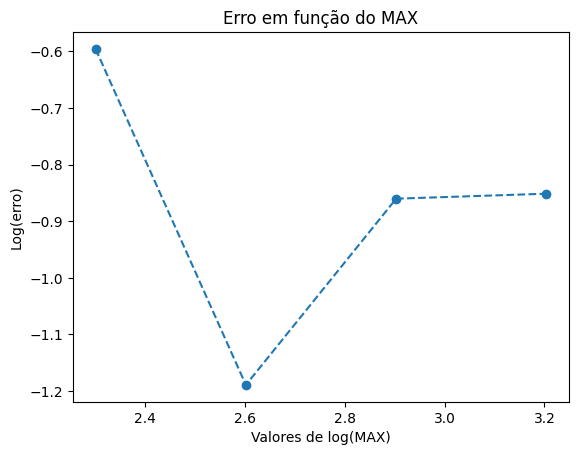

In [ ]:
erroMC = []
max = [200, 400, 800, 1600]  # Retirando o último (usamos o último para aproximar como valor real)
logmax = np.log10(max)

for i in range(len(MC)):
  erroMC.append( abs(MC[i] - valor_exato) )
logerroMC = np.log10(erroMC)

plt.plot(logmax, logerroMC, linestyle='--', marker='o')
plt.title("Erro em função do MAX")
plt.xlabel('Valores de log(MAX)')
plt.ylabel('Log(erro)')
plt.show()

#### Gráfico log-log usando o MC 10 vezes


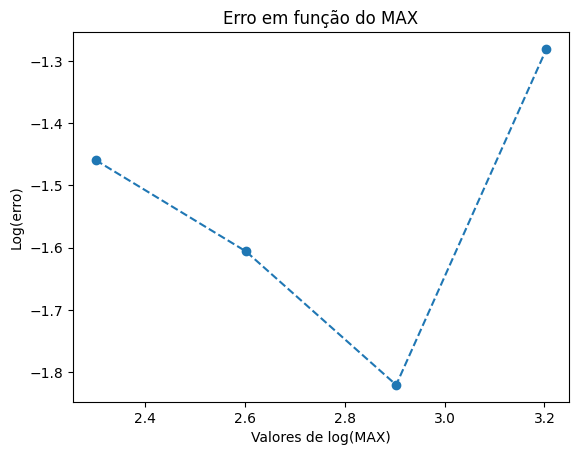

In [ ]:
erroMC10 = []

for i in range(len(MC10)):
  erroMC10.append( abs(MC10[i] - valor_exato) )
logerroMC10 = np.log10(erroMC10)

plt.plot(logmax, logerroMC10, linestyle='--', marker='o')
plt.title("Erro em função do MAX")
plt.xlabel('Valores de log(MAX)')
plt.ylabel('Log(erro)')
plt.show()

### Letra C

In [ ]:
lin_regMC = LinearRegression(fit_intercept = False)
lin_regMC.fit(logmax.reshape(-1, 1), logerroMC)

lin_regMC10 = LinearRegression(fit_intercept = False)
lin_regMC10.fit(logmax.reshape(-1, 1), logerroMC10)


lin_regMC.coef_, lin_regMC10.coef_

(array([-0.31503025]), array([-0.55018236]))

#### Gráficos

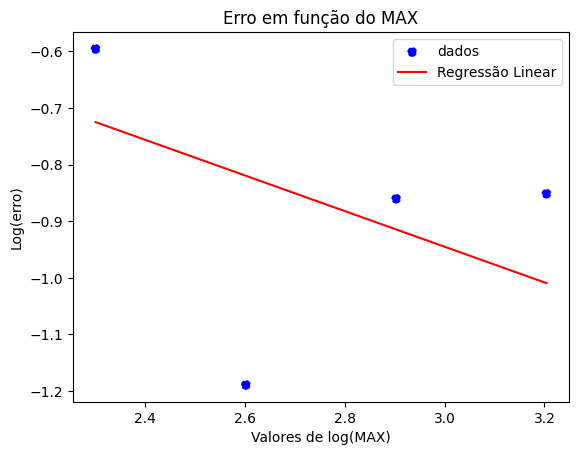

In [ ]:
plt.scatter(logmax, logerroMC, linestyle='--', marker='o', color = 'blue', label = 'dados')
plt.plot(logmax, lin_regMC.predict(logmax.reshape(-1,1)), color = 'red', label = 'Regressão Linear')
plt.title("Erro em função do MAX")
plt.xlabel('Valores de log(MAX)')
plt.ylabel('Log(erro)')
plt.legend()
plt.show()

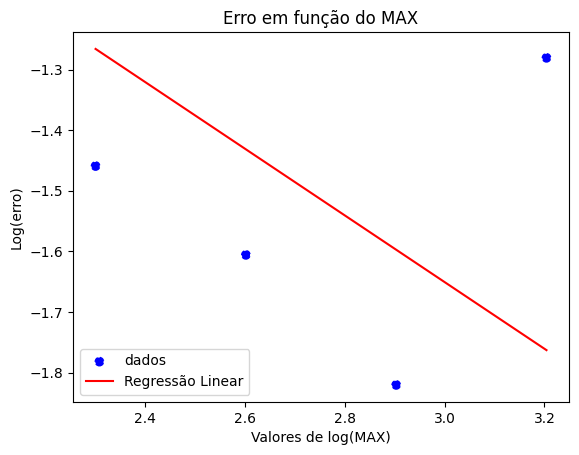

In [ ]:
plt.scatter(logmax, logerroMC10, linestyle='--', marker='o', color = 'blue', label = 'dados')
plt.plot(logmax, lin_regMC10.predict(logmax.reshape(-1,1)), color = 'red', label = 'Regressão Linear')
plt.title("Erro em função do MAX")
plt.xlabel('Valores de log(MAX)')
plt.ylabel('Log(erro)')
plt.legend()
plt.show()

### Letra D

#### Testando para $ B = 5$

In [ ]:
B = 5

MC_200_ko = estimated_value_ko(200, N, S0, u, d, r, k, payoff_ko, B)
MC_400_ko = estimated_value_ko(400, N, S0, u, d, r, k, payoff_ko, B)
MC_800_ko = estimated_value_ko(800, N, S0, u, d, r, k, payoff_ko, B)
MC_1600_ko = estimated_value_ko(1600, N, S0, u, d, r, k, payoff_ko, B)

MC_ko = [MC_200_ko, MC_400_ko, MC_800_ko, MC_1600_ko]

In [ ]:
B_s = np.linspace(0, 15, num = 100)

MC_ko_s = []
for B in B_s:
  value_ko = estimated_value_ko(1600, N, S0, u, d, r, k, payoff_ko, B)
  MC_ko_s.append(value_ko)

MC_ko_s = np.array(MC_ko_s)

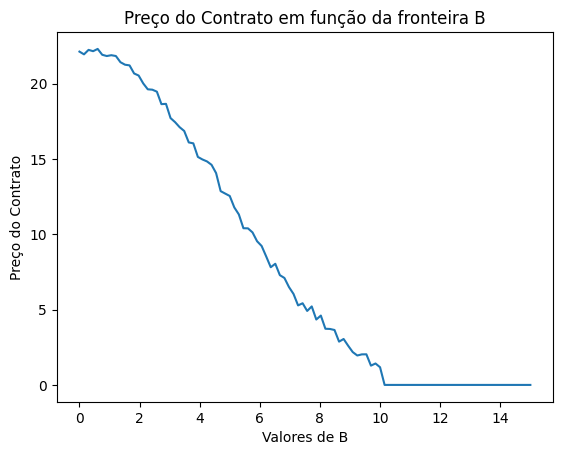

In [ ]:
plt.plot(B_s, MC_ko_s)
plt.title('Preço do Contrato em função da fronteira B')
plt.xlabel('Valores de B')
plt.ylabel('Preço do Contrato')
plt.show()